# BigInt Playground

Just messing about with some `BigInt` stuff

In [2]:
using BenchmarkTools

In [3]:
typemax(Int64)

9223372036854775807

In [4]:
bi = BigInt(typemax(Int64)) + 1

9223372036854775808

In [5]:
bi^2

85070591730234615865843651857942052864

In [6]:
big"2"^157

182687704666362864775460604089535377456991567872

In [7]:
decimal_string=string(big"2"^157)

"182687704666362864775460604089535377456991567872"

In [8]:
occursin("666", decimal_string)

true

In [9]:
big = big"2"^30000

7940903519132960324132517843492702513993728125208692855608343385791937317443908783509203179530892191987155926623978283105489921384424923263573391363734522382231742028063376725759936388639366060309563838895747548705834901470733791335653266902911839098782447109218743196966760157998340228043734553776187051118620709439579947093508401401631712073916879445638849346437187368000288168434884333847925762236847628855418907650698624898277065152326488047315941120701839655677173867549336208651066198963223290589867846485132811671585188249558469966534679356622663014517463255220325474870240326369687171527575053114352298945393524403254488026713532705619878245336270252062774783554202422698010972274190731058780728665028820297377514920071911925316084153056162480126388256580805608668574098316652608084771381953279181807157124713495613535424964215087630579096416669412630963986266552255718328160093117171637176650461295905567798132566281830354760366845352847955988129319896463854644608371823052534475141787679872

In [10]:
# This is a wrapped convenience function from Julia to the
# underlying mpz_get_str() function from GMP
#
# This allows transformation into arbitrary bases
@benchmark Base.GMP.string(big, base=17, pad=100)


BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  69.208 μs …  1.517 ms  ┊ GC (min … max): 0.00% … 93.75%
 Time  (median):     69.792 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   71.944 μs ± 22.441 μs  ┊ GC (mean ± σ):  0.52% ±  1.61%

  ▆█▆▅▄▂▁     ▂▃▃▃▂▂▁▁       ▁▁▁    ▁                         ▁
  ████████▇▆▇██████████▇▇▆█████████████▇▆▆▆▆▅▆▇▇▇▇▇▆▆▆▅▅▆▄▅▄▄ █
  69.2 μs      Histogram: log(frequency) by time        86 μs <

 Memory estimate: 16.17 KiB, allocs estimate: 4.

In [11]:
# The Julia native function to split the number into separate digits
# in a particular base. From StackOverflow it's slower than the GMP.string()
# function (though more flexible)
#
# Actually, it doesn't seem to be very much slower at all!
@benchmark digits(big, base=17)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  73.292 μs …  1.514 ms  ┊ GC (min … max): 0.00% … 93.85%
 Time  (median):     75.833 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   78.970 μs ± 33.953 μs  ┊ GC (mean ± σ):  1.62% ±  3.58%

  ▃▄   ▄██▆▄▂▁   ▁▂▃▄▃▃▂▂▁     ▁▁▁▁▁▁▂▁▂                      ▂
  ██▇▂▃█████████████████████▇██████████████▇█▇▇▇█▇██▇▇▇▆▆▆▆▆▆ █
  73.3 μs      Histogram: log(frequency) by time      92.7 μs <

 Memory estimate: 73.59 KiB, allocs estimate: 6.

In [12]:
using Plots

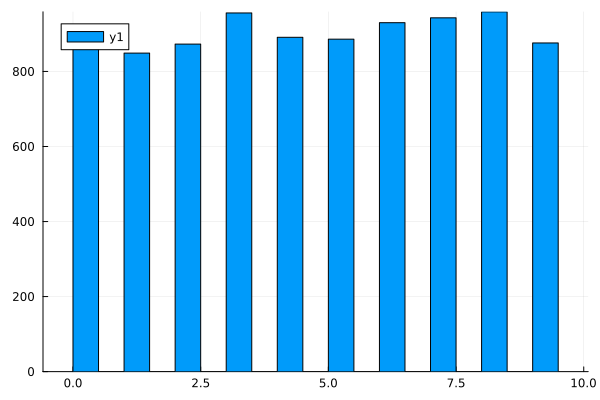

In [13]:
histogram(digits(big))